# Book Recommendation

The goal is to get a recommender system based on the users and ratings data.

In this project, we will try to create a book recommender system based on the users and ratings data. You can click the link below to access the dataset. The Book-Crossing dataset comprises 3 files.
* **Users:**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

* **Books:**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

* **Ratings:**
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

Dataset:
* https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

## Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
users = pd.read_csv('D:/Working Directory/Python/Final Project DS - Kelas.Work/Book Recommendation Dataset/Users.csv')
books = pd.read_csv('D:/Working Directory/Python/Final Project DS - Kelas.Work/Book Recommendation Dataset/Books.csv')
ratings = pd.read_csv('D:/Working Directory/Python/Final Project DS - Kelas.Work/Book Recommendation Dataset/Ratings.csv')

C:\Users\sabri\AppData\Local\Temp\ipykernel_20896\439225532.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('D:/Working Directory/Python/Final Project DS - Kelas.Work/Book Recommendation Dataset/Books.csv')


In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Check Null Values

In [6]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

**There is a lot of missing data in Age column. We don't need to clean it, bcs we'll only use this column for EDA, and not in recommender system.**

In [7]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

**We can remove the missing value in Book-Author, Publisher, and Image-URL-L columns, bcs there are just 2-3 rows with missing values.**

## EDA

In [9]:
# Check the number of ISBN
books.groupby("Book-Title").agg({"ISBN":"count"}).sort_values("ISBN",ascending=False).head(10)

,ISBN
Book-Title,
Selected Poems,27
Little Women,24
Wuthering Heights,21
Dracula,20
Adventures of Huckleberry Finn,20
The Secret Garden,20
Jane Eyre,19
The Night Before Christmas,18
Pride and Prejudice,18


#### **Analisis tentang variabel `ISBN`**

* There are multiple ISBN for the same Book Title.
* Why? This might be due to multiple reasons such as: different editions, reprints/revisions version, different regional variants, etc.

In [10]:
# Check how many users in a specific age group
users["Age"].value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: count, Length: 165, dtype: int64

C:\Users\sabri\AppData\Local\Temp\ipykernel_20896\1378023070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 32.0
Mean: 34.75143370454978
Std Dev: 14.428097382455773


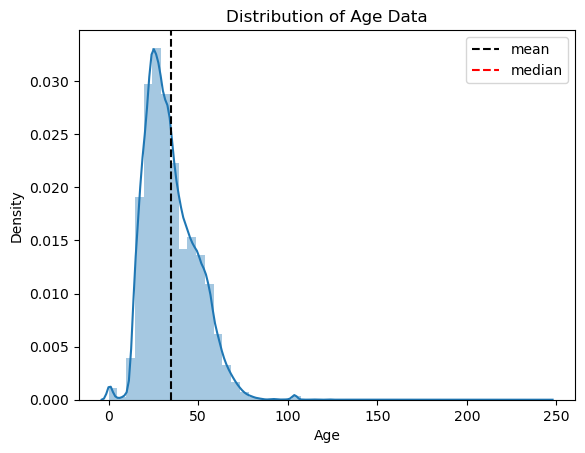

In [11]:
#visualize age data
x = users["Age"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of Age Data")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

* There are users in the data whom age is MORE THAN 80, which is odd. We can consider this as irrelevant values and put aside from visualization.
* We're also removing age under 10 years from visualization, so we can be sure that users that give ratings are old enough and mindfully rated the books.

C:\Users\sabri\AppData\Local\Temp\ipykernel_20896\1049198559.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 32.0
Mean: 34.72132221667859
Std Dev: 13.479361672423165


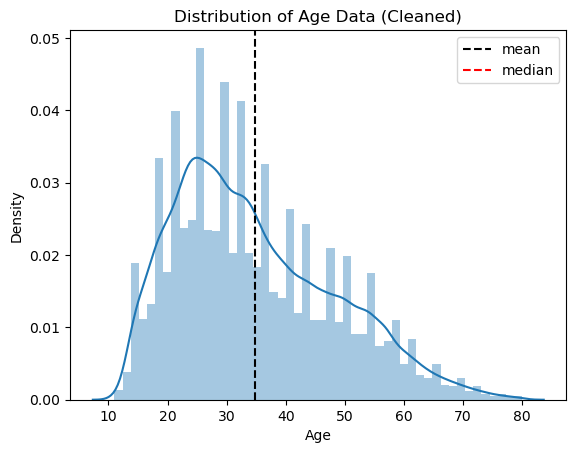

In [12]:
#remove users <=10 years & >80 years
usersv = users[~((users["Age"] <= 10) | (users["Age"] > 80))]

#visualize age data
x = usersv["Age"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of Age Data (Cleaned)")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis on `Age`**

* From the visualization, we can see that most ages that give ratings are from a group of users between 20-35 yrs old.
* Question:
    * Why users with 20-35 yrs old are the most group of people whom rated books?
    * Is this because they read more books than the other groups and actively giving ratings to the books they have read?

In [13]:
# Check how many specific ratings group has been given
ratings["Book-Rating"].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

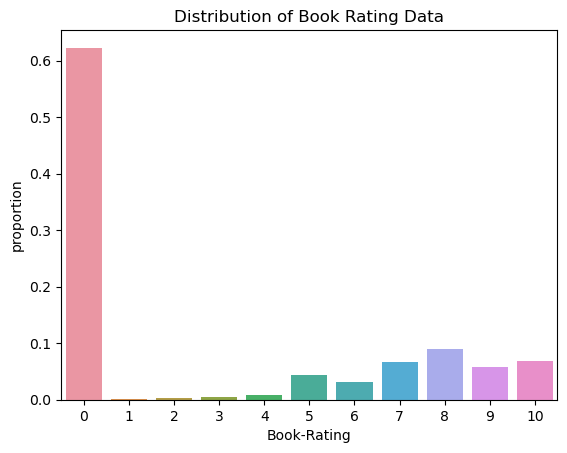

In [14]:
#visualize ratings data
sns.barplot(x=ratings['Book-Rating'].value_counts().index,
                 y=ratings['Book-Rating'].value_counts(normalize = True))
plt.title("Distribution of Book Rating Data")
plt.show()

* There are a LOT of books with 0 ratings. We can assume that 0 means that the books is just not get rated from users or consider it missing value, and not necessarily mean a "bad book".
* So to get correct proportion of the visualization of book rating data, we should remove ratings with 0 value and only visualize data with ratings 1-10.

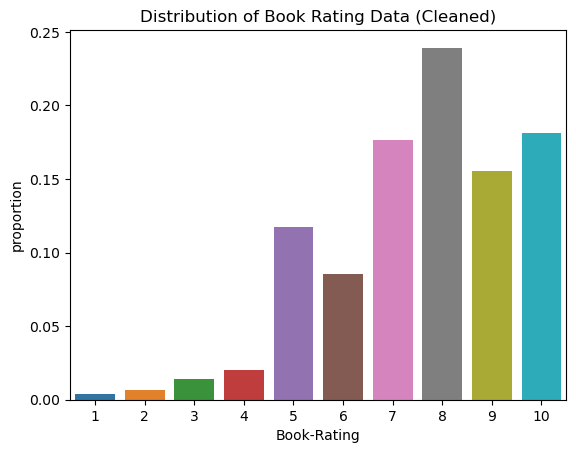

In [15]:
#remove ratings 0
ratingsv = ratings[~(ratings["Book-Rating"] == 0)]

#visualize ratings data
sns.barplot(x=ratingsv['Book-Rating'].value_counts().index,
                 y=ratingsv['Book-Rating'].value_counts(normalize = True))
plt.title("Distribution of Book Rating Data (Cleaned)")
plt.show()

#### **Analysis on `Book-Rating`**

* We can see that most books are rated 8 (almost 25%), with top # of ratings are varied between 7-10.
* Question:
    * Why most books are rated 8?
    * What books with most rated in the data? And which users groups who mostly rated that books?

## Merge Data

In [16]:
new_books = books.drop_duplicates('Book-Title')
new_books.shape

(242135, 8)

In [17]:
books_ratings = new_books.merge(ratings,on='ISBN')
books_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


### Users Who Rated the Most

In [18]:
# Merged books ratings with Age column
merged_df = books_ratings.merge(users, on='User-ID')

# Check on the top 10 users who rated the most
result_df = merged_df.groupby("User-ID").agg({"Book-Title": "count", "Age": "first"})
result_df.columns = ["Book-Title Count", "Age"]

# Sort the DataFrame by book title count in descending order
top_10_users = result_df.sort_values("Book-Title Count", ascending=False).head(10)

# Display the top 10 users and their book titles along with their age
print(top_10_users)

         Book-Title Count   Age
User-ID                        
11676                9496   NaN
198711               5918  62.0
98391                5153  52.0
153662               5091  44.0
35859                4901   NaN
212898               3725   NaN
278418               3652   NaN
76352                2796  58.0
110973               2605  43.0
16795                2589  47.0


### Most Rated Books

In [19]:
#Check on the Top 5 Books with most rated
result_df = merged_df.groupby("Book-Title").agg({
    "Book-Rating": "count",
    "Age": ["median"]
})
result_df.columns = ["Book-Rating Count", "Avg Age"]

# Sort the DataFrame by book rating count in descending order
top_commented_books = result_df.sort_values("Book-Rating Count", ascending=False).head(5)

# Display the top commented books along with the average and median age
print(top_commented_books)

                                                 Book-Rating Count  Avg Age
Book-Title                                                                 
Wild Animus                                                   2502     32.0
The Lovely Bones: A Novel                                     1295     34.0
The Da Vinci Code                                              883     35.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel                732     34.0
The Red Tent (Bestselling Backlist)                            723     34.0


#### **Analysis on relationship between variable**

* Based on the data of top 10 users who rated the most, we can see that most of them are users within >40 yrs old age group, with the top user has rated more than 11K book title.
* While the rest of the users in the top 10 has rated more than 2.9K book title.
* On the other hand, book with the most rated are "Wild Animus" with a total of 2502 ratings. While the other top 5 books has more than 800 ratings.
* We can also see that the Average age that rated these top 5 books are users within 30-40 yrs old age group.

## Recommender System

In [20]:
books_ratings.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              1
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64

In [21]:
# Since the # of values with NA is very small, we can just remove it from the data
books_ratings.dropna(inplace = True)
books_ratings.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

In [22]:
# Check duplicate duplicate ratings from the same user
books_ratings[books_ratings[['User-ID', 'ISBN']].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating


Since there are no duplicate, we move to the next step

In [23]:
book_dict1 = {}
book_dict2 = {}
for x, y in zip(books_ratings['ISBN'], books_ratings['Book-Title']):
    if x not in book_dict1.keys():
        book_dict1[x] = y
        book_dict2[y] = x

In [24]:
books_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


## Content-Based Recommendation (Popular Books)

Create custom function book recommendation based on avg highest rating with 3 argument:
1. number of recommended books
2. rating count limit that will be put in the recommendation
3. dataset (can be transform)

Print 50 books recommendation that has been rated by min. 100 users

In [25]:
books_ratings.groupby('ISBN').count()['User-ID']

ISBN
0000913154    1
0001010565    2
0001046438    1
0001046713    1
000104687X    1
             ..
B0001GDNCK    1
B0001I1KOG    1
B00029DGGO    1
B0002JV9PY    1
B0002K6K8O    1
Name: User-ID, Length: 241055, dtype: int64

In [26]:
books_ratings.groupby('ISBN').mean(numeric_only=True)['Book-Rating']

ISBN
0000913154     8.0
0001010565     0.0
0001046438     9.0
0001046713     0.0
000104687X     6.0
              ... 
B0001GDNCK     0.0
B0001I1KOG    10.0
B00029DGGO     0.0
B0002JV9PY     0.0
B0002K6K8O     0.0
Name: Book-Rating, Length: 241055, dtype: float64

In [27]:
popular = pd.DataFrame({'count':books_ratings.groupby('ISBN').count()['User-ID'],
                       'rating':books_ratings.groupby('ISBN').mean(numeric_only=True)['Book-Rating']})

In [28]:
popular.head()

,count,rating
ISBN,,
0000913154,1,8.0
0001010565,2,0.0
0001046438,1,9.0
0001046713,1,0.0
000104687X,1,6.0


In [29]:
def popular_recom(k, count, dataset):
    a = []
    popular2 = dataset[dataset['count']>=count].sort_values('rating', ascending=False)
    for x in popular2.index[:k]:
        a.append(book_dict1[x])
    return a

In [30]:
popular_recom(50, 100, popular)

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'The Perks of Being a Wallflower',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'To Kill a Mockingbird',
 'The Giver (21st Century Reference)',
 'Ishmael: An Adventure of the Mind and Spirit',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Interpreter of Maladies',
 'Anne Frank: The Diary of a Young Girl',
 "Charlotte's Web (Trophy Newbery)",
 'The Other Boleyn Girl',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Animal Farm',
 'The Last Juror',
 'The Da Vinci Code',
 'The Catcher in the Rye',
 'Dragonfly in Amber',
 'Stranger in a Strange Land (Remembering Tomorrow)',
 '1984',
 'Dune (Remembering Tomorrow)',
 'A Wrinkle In Time',
 "East of Eden (Oprah's Book Club)",
 'The Five People You Meet in Heaven',
 'The Stand: Complete

## User-Based Recommendation (Collaborative Filtering)

Create another function books recommendation, but this time using **Collaborative Filtering** model.

We will narrow down the data to users who have rated numerous books and then further filter based on the most frequently rated books.

In [31]:
br2 = books_ratings[['User-ID', 'Book-Rating', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
br2.head()

,User-ID,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [32]:
br2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883072 entries, 0 to 883078
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              883072 non-null  int64 
 1   Book-Rating          883072 non-null  int64 
 2   ISBN                 883072 non-null  object
 3   Book-Title           883072 non-null  object
 4   Book-Author          883072 non-null  object
 5   Year-Of-Publication  883072 non-null  object
 6   Publisher            883072 non-null  object
dtypes: int64(2), object(5)
memory usage: 53.9+ MB


In [33]:
x = br2.groupby('User-ID').count()['Book-Rating'] > 100
knowledgeable_users = x[x].index
type(knowledgeable_users)

pandas.core.indexes.base.Index

In [34]:
filtered_users = br2[br2['User-ID'].isin(knowledgeable_users)]
filtered_users.head()

,User-ID,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
3,11676,8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
6,85526,0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
7,96054,0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
10,177458,0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
21,110912,10,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux


In [35]:
y = filtered_users.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
type(famous_books)

pandas.core.indexes.base.Index

In [36]:
final_users = filtered_users[filtered_users['Book-Title'].isin(famous_books)]
final_users.head()

,User-ID,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
98,277478,0,0440234743,The Testament,John Grisham,1999,Dell
103,2977,0,0440234743,The Testament,John Grisham,1999,Dell
105,3363,0,0440234743,The Testament,John Grisham,1999,Dell
108,7346,9,0440234743,The Testament,John Grisham,1999,Dell
111,9747,0,0440234743,The Testament,John Grisham,1999,Dell


In [37]:
pivot_table = final_users.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')
pivot_table.fillna(0, inplace = True)
pivot_table.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274808,275020,275970,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
scaler = StandardScaler(with_mean=True, with_std=True)
pt_normalized = scaler.fit_transform(pivot_table)
pt_normalized

array([[ 7.64872154, -0.07946654, -0.11651892, ..., -0.08988424,
        -0.08753254, -0.0977649 ],
       [-0.13389447, -0.07946654, -0.11651892, ..., -0.08988424,
        -0.08753254, -0.0977649 ],
       [-0.13389447, -0.07946654, -0.11651892, ..., -0.08988424,
        -0.08753254, -0.0977649 ],
       ...,
       [-0.13389447, -0.07946654, -0.11651892, ..., -0.08988424,
        -0.08753254, -0.0977649 ],
       [-0.13389447, -0.07946654, -0.11651892, ..., -0.08988424,
        -0.08753254, -0.0977649 ],
       [-0.13389447, -0.07946654, -0.11651892, ..., -0.08988424,
        -0.08753254, -0.0977649 ]])

### Create Model

In [39]:
similarity_matrix = cosine_similarity(pt_normalized)
similarity_matrix.shape

(620, 620)

In [40]:
def recommend(book_name):
    
    # returns the numerical index for the book_name
    index = np.where(pivot_table.index==book_name)[0][0]
    
    # sorts the similarities for the book_name in descending order
    similar_books = sorted(list(enumerate(similarity_matrix[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    # To return result in list format
    data = []
    
    for index,similarity in similar_books:
        item = []
        # Get the book details by index
        temp_df = new_books[new_books['Book-Title'] == pivot_table.index[index]]
        
        # Only add the title, author, and image-url to the result
        item.extend(temp_df['Book-Title'].values)
        item.extend(temp_df['Book-Author'].values)
        item.extend(temp_df['Image-URL-M'].values)
        
        data.append(item)
    return data

In [41]:
recommend("Wild Animus")

[['Pay It Forward',
  'Catherine Ryan Hyde',
  'http://images.amazon.com/images/P/0743412028.01.MZZZZZZZ.jpg'],
 ["She's Come Undone (Oprah's Book Club)",
  'Wally Lamb',
  'http://images.amazon.com/images/P/0671021001.01.MZZZZZZZ.jpg'],
 ['Circle of Friends',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440211263.01.MZZZZZZZ.jpg'],
 ['A Year in Provence',
  'Peter Mayle',
  'http://images.amazon.com/images/P/0679731148.01.MZZZZZZZ.jpg'],
 ['The Cove',
  'Catherine Coulter',
  'http://images.amazon.com/images/P/0515118656.01.MZZZZZZZ.jpg']]

Based on the Results, the **Top 5 Recommended Books** that are similar with `Wild Animus` are:
1. `Pay It Forward` by Chaterine Ryan Hyde
2. `She's Come Undone (Oprah's Book Club)` by Wally Lamb
3. `Circle of Friends` by Maeve Binchy
4. `A Year in Provence` by Peter Mayle
5. `The Cove` by Catherine Coulter

Let's see the accuracy by cross-checking between each books in the results.

In [42]:
recommend("Pay It Forward")

[['D Is for Deadbeat (Kinsey Millhone Mysteries (Paperback))',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0553271636.01.MZZZZZZZ.jpg'],
 ['Circle of Friends',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440211263.01.MZZZZZZZ.jpg'],
 ['Wild Animus',
  'Rich Shapero',
  'http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg'],
 ["The Dive From Clausen's Pier : A Novel (Vintage Contemporaries (Paperback))",
  'ANN PACKER',
  'http://images.amazon.com/images/P/0375727132.01.MZZZZZZZ.jpg'],
 ['K Is for Killer (Kinsey Millhone Mysteries (Paperback))',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0449221504.01.MZZZZZZZ.jpg']]

In [43]:
recommend("Circle of Friends")

[['The Glass Lake',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440221595.01.MZZZZZZZ.jpg'],
 ['The Bonfire of the Vanities',
  'Tom Wolfe',
  'http://images.amazon.com/images/P/0553275976.01.MZZZZZZZ.jpg'],
 ['Pay It Forward',
  'Catherine Ryan Hyde',
  'http://images.amazon.com/images/P/0743412028.01.MZZZZZZZ.jpg'],
 ['The Return Journey',
  'MAEVE BINCHY',
  'http://images.amazon.com/images/P/0440224594.01.MZZZZZZZ.jpg'],
 ['GARDEN OF SHADOWS (Dollanger Saga (Paperback))',
  'Ariel Jennifer Jones',
  'http://images.amazon.com/images/P/067164257X.01.MZZZZZZZ.jpg']]

In [44]:
recommend("The Cove")

[['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['The Third Twin',
  'Ken Follett',
  'http://images.amazon.com/images/P/0449227421.01.MZZZZZZZ.jpg'],
 ['Sanctuary',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515122734.01.MZZZZZZZ.jpg'],
 ['The Celestine Prophecy (Celestine Prophecy)',
  'James Redfield',
  'http://images.amazon.com/images/P/044651862X.01.MZZZZZZZ.jpg'],
 ['Mutation',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425119653.01.MZZZZZZZ.jpg']]